### Run the following cell to initialise the notebook

Place cursor over cell and click

Then hold the Shift key and press Enter

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import ipywidgets as widgets

print('Done! Notebook initialised')

Done! Notebook initialised


### Run the following cell to set up a functions we will use a few times

In [2]:
def gaussian(x,a0=13.,b=50.,c=10.):
    return a0 * np.exp(-1*(x-b)**2/(2*c**2))

def plot_curve(Width,Amplitude):
    manual_tune = gaussian(x,a0=Amplitude,c=Width/(2*np.sqrt(2*np.log(2))))
    plt.figure(2)
    plt.plot(noisy_curve)
    plt.plot(manual_tune)
    plt.show()
    
print('Done! Generated functions')

Done! Generated functions


### Run the following cell to plot a noisy curve

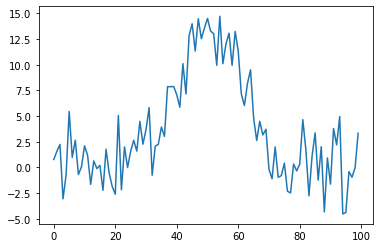

In [3]:
x = np.arange(0,100)
noise_scale = 0.2*13
noisy_curve = gaussian(x)+noise_scale*np.random.normal(0,1,100)
plt.figure(1)
plt.plot(noisy_curve)

### Run the following cell and then use the sliders to see what happens

Run the cell first to set up the sliders.

Change the parameters by dragging with your mouse to explore the best fit.

Try to make the orange and blue lines overlap as much as possible!

Be careful - if you change things too quickly, the lag to update may get confusing.

In [4]:
interactive_plot = widgets.interactive(plot_curve, Width=(1, 100), Amplitude=(0.5,50))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='Width', min=1), FloatSlider(value=25.25, description='A…

### Fill in the following guesses based on your best estimate of the parameters

Enter the width after the '=' here:

In [5]:
Width_Guess = 

Enter the amplitude after the '=' here:

In [6]:
Amplitude_Guess = 

In [7]:
a = Amplitude_Guess
b = 50
c = Width_Guess/2*np.sqrt(2*np.log(2))

fitting_results = curve_fit(gaussian,x,ydata = noisy_curve,p0=(a,b,c))

print('Fit amplitude: ' + str(fitting_results[0][0]))
print('Fit centre: ' + str(fitting_results[0][1]))
print('Fit width: ' +str(fitting_results[0][2]))

Fit amplitude: 13.723227523456437
Fit centre: 50.71044144043608
Fit width: 10.228111462185733


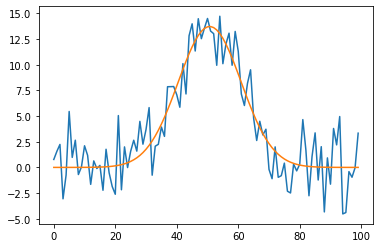

In [8]:
fit_curve = gaussian(x,a0=fitting_results[0][0],b=fitting_results[0][1],c=fitting_results[0][2])
plt.plot(noisy_curve)
plt.plot(fit_curve)